In [4]:
from manifold import KNNgraph,Isomap 
import numpy as np
import matplotlib.pyplot as plt



In [5]:
X = np.array([[1,2],[7,8],[5,6],[3,4]])

knn = KNNgraph(X,2)
#knn.find_neighbours()
m = knn.create_graph()

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()


X,y = digits['data'], digits['target']

In [9]:
im = Isomap(X,num_dim = 2,k = 10)

[[  0.         182.67582953 168.12950779 ... 188.59953915 171.981707
  175.65376101]
 [182.67582953   0.          71.60594365 ...  64.0767387  122.36245994
   88.43681903]
 [168.12950779  71.60594365   0.         ...  76.76578347 128.83696263
   90.76763588]
 ...
 [188.59953915  64.0767387   76.76578347 ...   0.          86.89938587
   28.87905816]
 [171.981707   122.36245994 128.83696263 ...  86.89938587   0.
   76.68584252]
 [175.65376101  88.43681903  90.76763588 ...  28.87905816  76.68584252
    0.        ]]


In [10]:
1/1757

0.0005691519635742744

In [11]:
im.project('kpca')

F:\mlfromscratch\DimensionalRed\Isomap\../../DimensionalRed/Kernal_PCA\kpca.py:68: UserWarning: La matriz K no es semidefinida positiva
  warnings.warn("La matriz K no es semidefinida positiva")
F:\mlfromscratch\DimensionalRed\Isomap\../../DimensionalRed/Kernal_PCA\kpca.py:70: RuntimeWarning: invalid value encountered in sqrt
  tuplas_eig = [(np.sqrt(eigval[i]), eigvec[:,i]/np.sqrt(eigval[i]) ) for i in range(len(eigval))]


array([[-0.04078503, -0.01464131],
       [ 0.01168393,  0.02250119],
       [ 0.01390572,  0.0013891 ],
       ...,
       [ 0.01709633, -0.000397  ],
       [ 0.01272604, -0.0253112 ],
       [ 0.0086615 , -0.01354169]])

In [12]:
im.project('mds')

<class 'numpy.ndarray'>


array([[ 98.4443493 ,  31.30548267],
       [-32.6595917 , -44.80019464],
       [-37.26291447,  -2.24518047],
       ...,
       [-46.96314389,   3.33668369],
       [-36.53595241,  55.13927223],
       [-26.93266355,  31.38405857]])

In [13]:
z = im.shortest_distance()

In [14]:
type(np.array([[1,2,3]]))

numpy.ndarray

In [15]:
z[3,5] , z[5,3]

(59.58509491122413, 59.58509491122413)

In [16]:
from sklearn.manifold import Isomap
embedding = Isomap(n_neighbors=10)
X_transformed = embedding.fit_transform(X)
X_transformed.shape

(1797, 2)

In [17]:
X_transformed

array([[ 99.02204132, -31.42076495],
       [-26.63601926,  46.9158799 ],
       [-33.77388503,   3.30857164],
       ...,
       [-43.1047666 ,   0.98381667],
       [-31.82563787, -52.3715874 ],
       [-21.42831743, -27.99208091]])

In [18]:
colors = []
X_im = im.project('kpca')
X_mds = im.project('mds')
X_ = []
X_t = []
X_m = []
y_ = []
for i in range(len(y)):
    if y[i] == 1:
        X_.append(X_im[i])
        X_t.append(X_transformed[i])
        X_m.append(X_mds[i])
        y_.append(1)
        colors.append('#FFB300')
    elif y[i] == 2:
        X_.append(X_im[i])
        X_t.append(X_transformed[i])
        X_m.append(X_mds[i])
        y_.append(2)
        colors.append('#E64A19')
    elif y[i] == 0:
        X_.append(X_im[i])
        X_t.append(X_transformed[i])
        X_m.append(X_mds[i])
        y_.append(0)
        colors.append('#00FF00')

F:\mlfromscratch\DimensionalRed\Isomap\../../DimensionalRed/Kernal_PCA\kpca.py:68: UserWarning: La matriz K no es semidefinida positiva
  warnings.warn("La matriz K no es semidefinida positiva")
F:\mlfromscratch\DimensionalRed\Isomap\../../DimensionalRed/Kernal_PCA\kpca.py:70: RuntimeWarning: invalid value encountered in sqrt
  tuplas_eig = [(np.sqrt(eigval[i]), eigvec[:,i]/np.sqrt(eigval[i]) ) for i in range(len(eigval))]


<class 'numpy.ndarray'>


In [19]:
X_im.shape

(1797, 2)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

def plot_scores_2d(data, colors, grid = True, dim_1 = 1, dim_2 = 2):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(15,10))
    plt.axhline(c = 'black', alpha = 0.2)
    plt.axvline(c = 'black', alpha = 0.2)
    plt.scatter(data.T[dim_1 - 1,:], data.T[dim_2 - 1,:], c = colors)
    plt.grid(grid)
    plt.title('Projection')
    plt.xlabel('{}st dimension'.format(dim_1))
    plt.ylabel('{}nd dimension'.format(dim_2))
    plt.show()

kpca


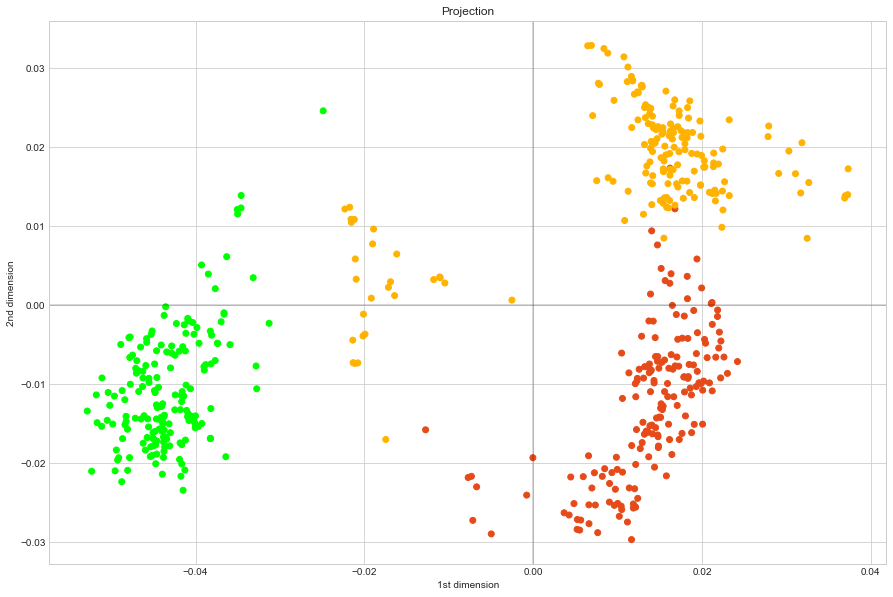

In [23]:
print('kpca')
plot_scores_2d(np.array(X_),colors)

mds


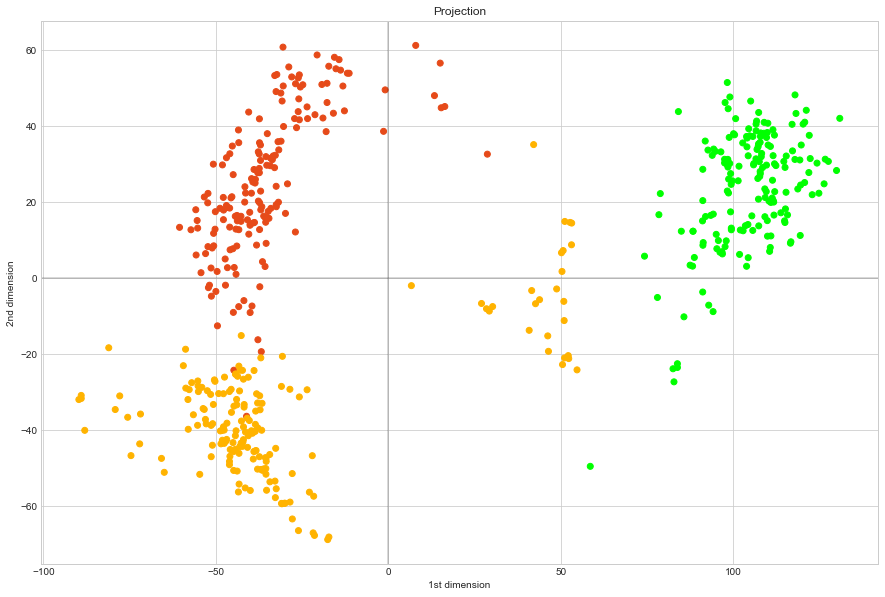

In [24]:
print('mds')
plot_scores_2d(np.array(X_m),colors)

scikit-isomap


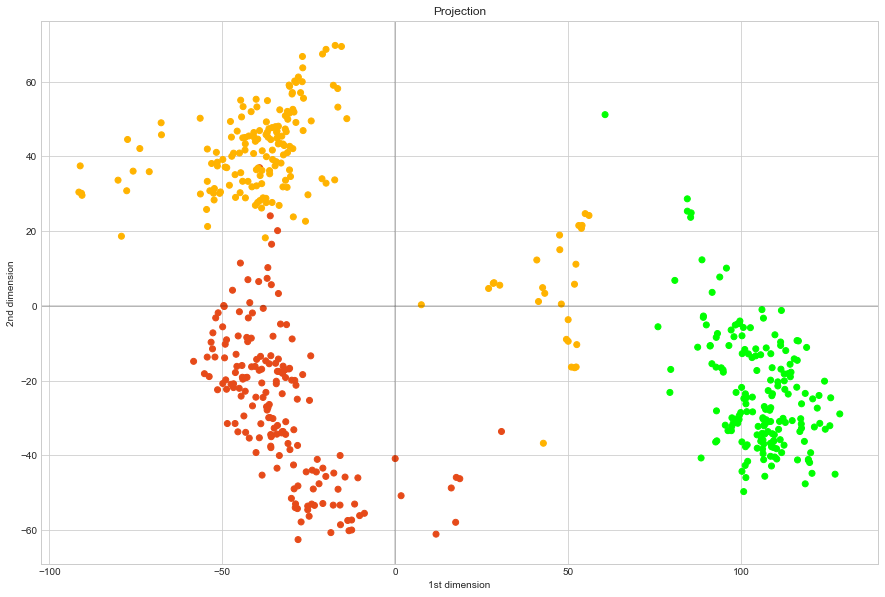

In [25]:
print('scikit-isomap')
plot_scores_2d(np.array(X_t),colors)